# Social Network Analysis - Class 12 - Visualizations, Simulations

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import networkx as nx
import igraph as ig

In [31]:
# slide 14

# The graph building function in Python only allows edge lists to contain integers
m = [(0, 1), (1, 0), (0, 2), (0, 3), (1, 4), (1, 5),
     (2, 6), (2, 7), (2, 8), (3, 9), (3, 10), (3, 11),
     (4, 12), (4, 13), (4, 14), (5, 15), (5, 16), (5, 17)]

In [32]:
g = ig.Graph(edges=m, directed=True)

# specify vertices color
colors = ['red']*2, ['orange']*4, ['yellow']*12
g.vs['color'] = [item for sublist in colors for item in sublist] 

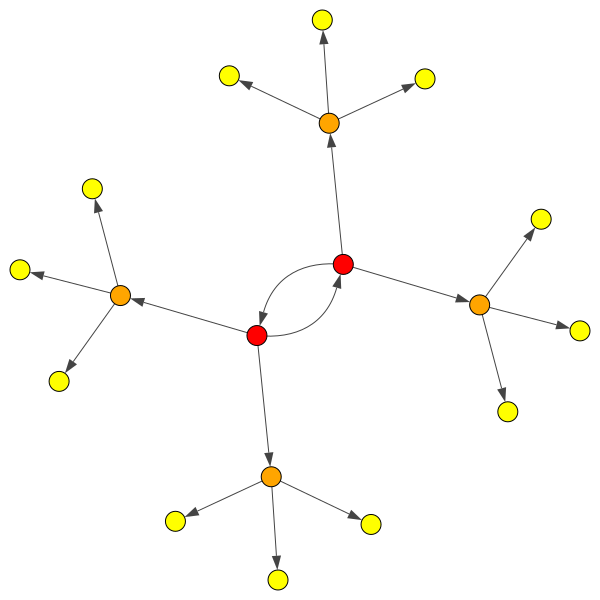

In [33]:
ig.plot(g)

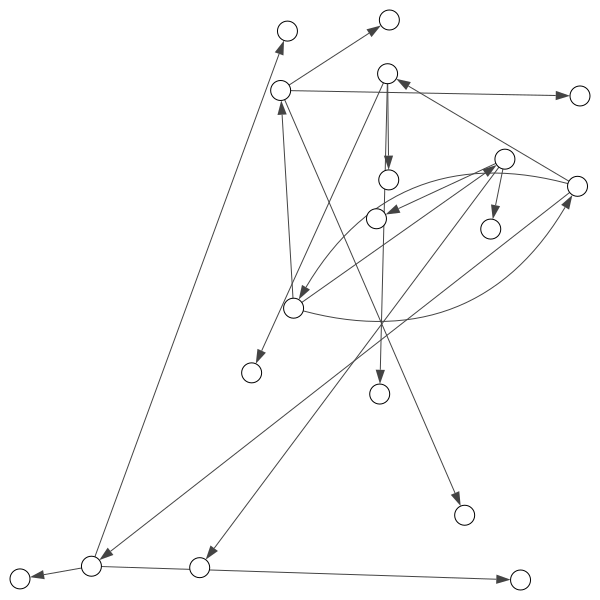

In [34]:
ig.plot(g, layout = g.layout_random(), vertex_color='white')

## Lazega example

In [90]:
test = pd.read_csv('Data/Lazega-Advice-Net.csv', skiprows=1, names=list(np.arange(1, 72)))
test.index = list(np.arange(1, 72))

g = ig.Graph.Adjacency((test.values>0).tolist())
g.vs['ID'] = test.index

lazega_attr = pd.read_csv('Data/Lazega-Atts.csv')

for c in lazega_attr.columns:
    g.vs[c] = lazega_attr.loc[lazega_attr.ID==g.vs['ID'], c]

In [91]:
gender_shape = {1: "circle", 2: "rectangle"}
status_color = {1: "pink", 2: "dodgerblue"}
practice_color = {1: "red", 2: "black"}
g.vs['size'] = 4*np.sqrt(g.indegree())
g.vs['label_cex'] = 15*np.array(g.outdegree())/max(g.outdegree())

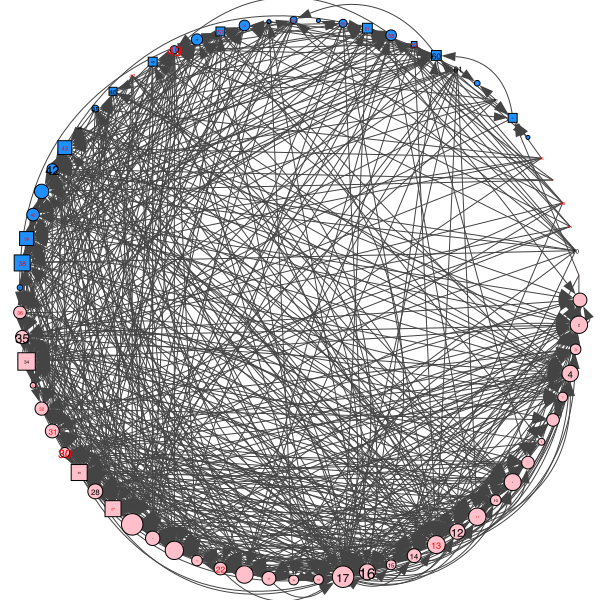

In [92]:
# slide 25
ig.plot(g, layout=g.layout_circle(), 
        vertex_shape = [gender_shape[gender] for gender in g.vs['gender']],
        vertex_color = [status_color[status] for status in g.vs['status']], 
        vertex_label = g.vs['ID'],
        vertex_label_color = [practice_color[practice] for practice in g.vs['practice']],
        vertex_size = g.vs['size'],
        vertex_label_size = g.vs['label_cex'])

In [41]:
# slide 34

gnc = g.community_edge_betweenness(directed=False)

gnc1 = gnc.as_clustering()

g.vs['membership'] = gnc1.membership

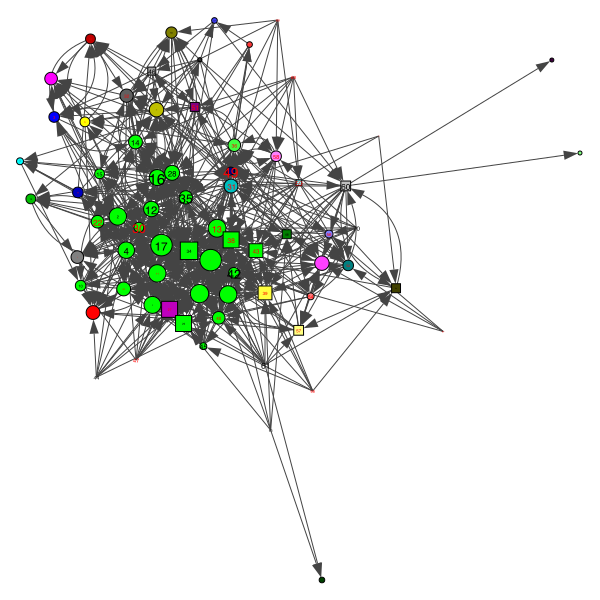

In [99]:
ig.plot(g, 
        vertex_shape = [gender_shape[gender] for gender in g.vs['gender']],
        vertex_color = g.vs['membership'], 
        vertex_label = g.vs['ID'],
        vertex_label_color = [practice_color[practice] for practice in g.vs['practice']],
        vertex_size = g.vs['size'],
        vertex_label_size = g.vs['label_cex'], 
        palette=ig.ClusterColoringPalette(len(set(g.vs['membership']))))